In [20]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns

In [4]:
df = pd.read_csv('M:/avocado.csv')

In [7]:
df.drop(columns='Unnamed: 0',inplace=True)

In [14]:
df.rename(columns={'4046':'4046_plu','4225':'4225_plu','4770':'4770_plu'},inplace=True)

In [15]:
df.head()

,Date,AveragePrice,Total Volume,4046_plu,4225_plu,4770_plu,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [16]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046_plu      18249 non-null  float64
 4   4225_plu      18249 non-null  float64
 5   4770_plu      18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [17]:
df_conv = df[df['type']=='conventional']
df_org = df[df['type']=='organic']

In [43]:
df_conv['Month'] = [t[1] for t in df_conv['Date'].str.split('-')]
df_org['Month'] = [t[1] for t in df_org['Date'].str.split('-')]
df_conv['revenue'] = df_conv['Total Volume']*df_conv['AveragePrice']
df_org['revenue'] = df_org['Total Volume']*df_org['AveragePrice']

c:\users\miksh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\miksh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\miksh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

c:\users\miksh\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\miksh\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


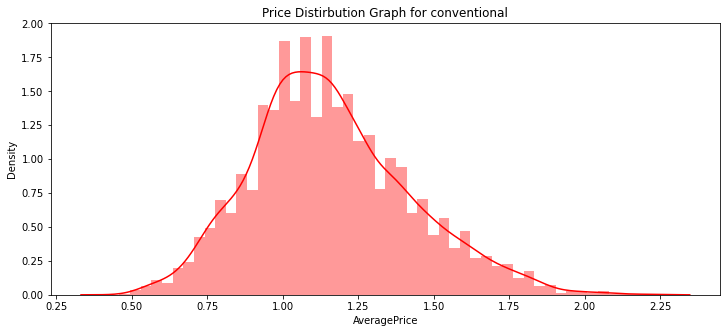

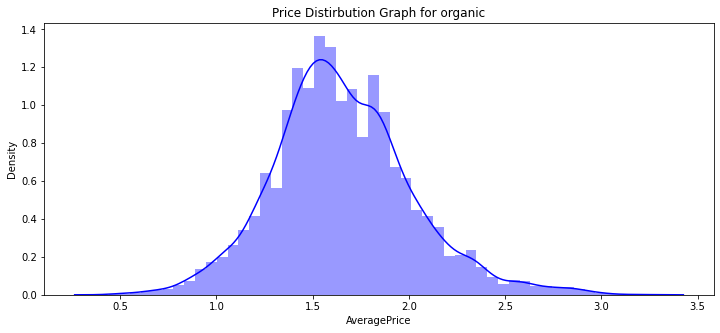

In [23]:
plt.figure(figsize=(12,5))
plt.title("Price Distirbution Graph for conventional")
ax = sns.distplot(df_conv['AveragePrice'], color = 'red')

plt.figure(figsize=(12,5))
plt.title("Price Distirbution Graph for organic")
ax = sns.distplot(df_org['AveragePrice'], color = 'blue')

Text(0.5, 1.0, 'Average Price for organic')

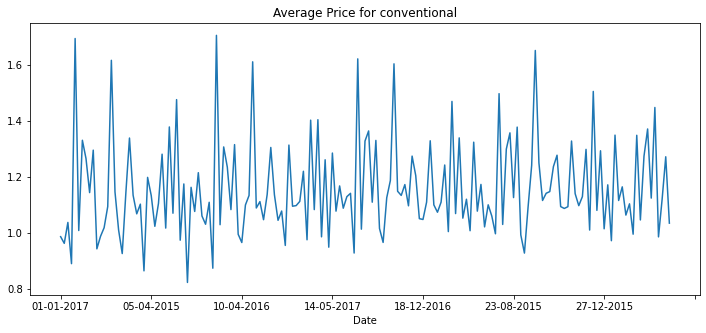

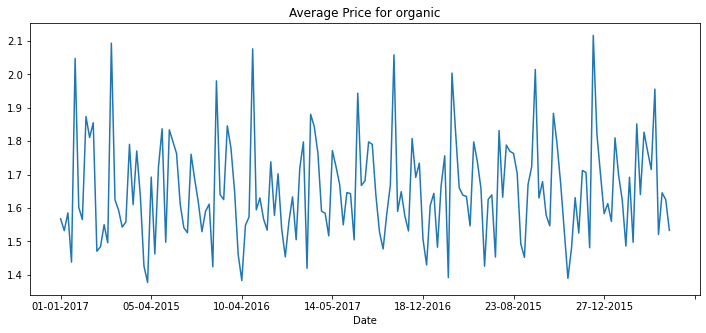

In [29]:
group_date=df_conv.groupby('Date').mean()
plt.figure(figsize=(12,5))
group_date['AveragePrice'].plot(x=df_conv['Date'])
plt.title('Average Price for conventional')

group_date=df_org.groupby('Date').mean()
plt.figure(figsize=(12,5))
group_date['AveragePrice'].plot(x=df_org['Date'])
plt.title('Average Price for organic')

Text(0.5, 1.0, 'Total revenue by conventional avocado sold')

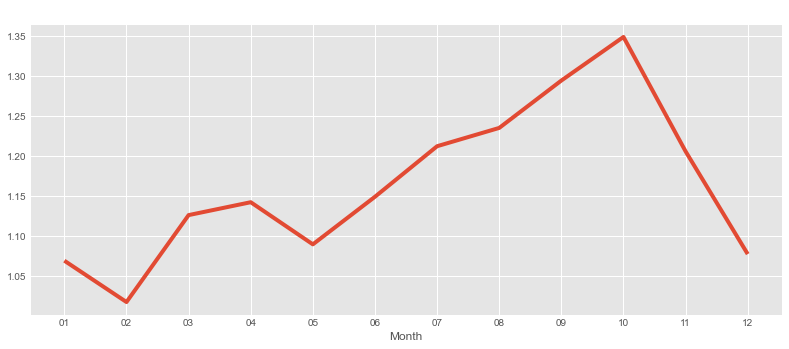

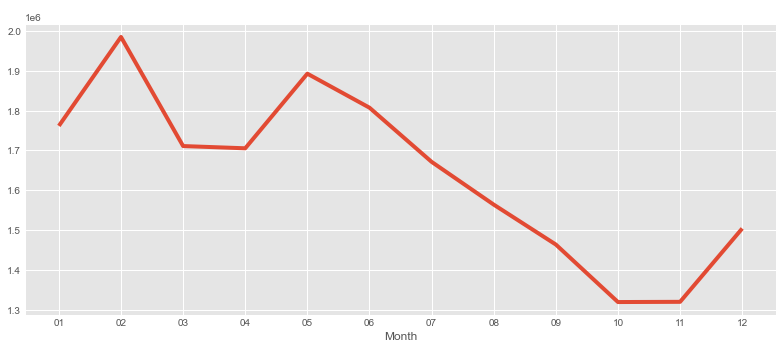

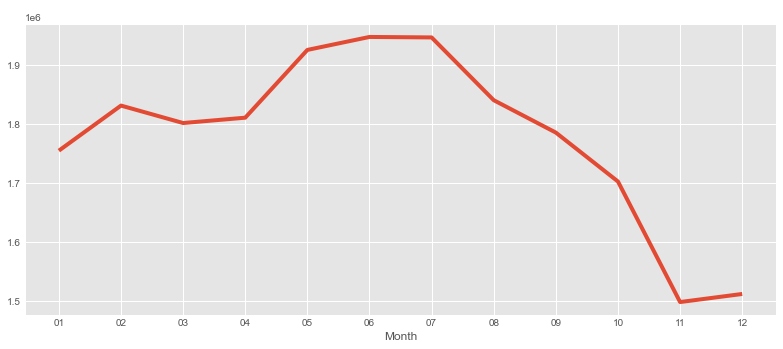

In [56]:
plt.style.use('ggplot')

month_group=df_conv.groupby('Month').mean()
fig, ax = plt.subplots(figsize=(12,5))
ax.xaxis.set(ticks=range(0,13)) 
month_group['AveragePrice'].plot(x=df_conv.Month)
plt.title('Average Price by Month for conventional')

month_group=df_conv.groupby('Month').mean()
fig, ax = plt.subplots(figsize=(12,5))
ax.xaxis.set(ticks=range(0,13)) 
month_group['Total Volume'].plot(x=df_conv.Month)
plt.title('Total volume of conventional avocado sold')

month_group=df_conv.groupby('Month').mean()
fig, ax = plt.subplots(figsize=(12,5))
ax.xaxis.set(ticks=range(0,13)) 
month_group['revenue'].plot(x=df_conv.Month)
plt.title('Total revenue by conventional avocado sold')

Text(0.5, 1.0, 'Total revenue by organic avocado sold')

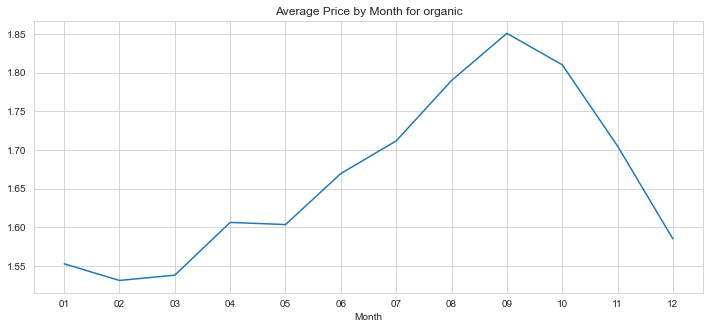

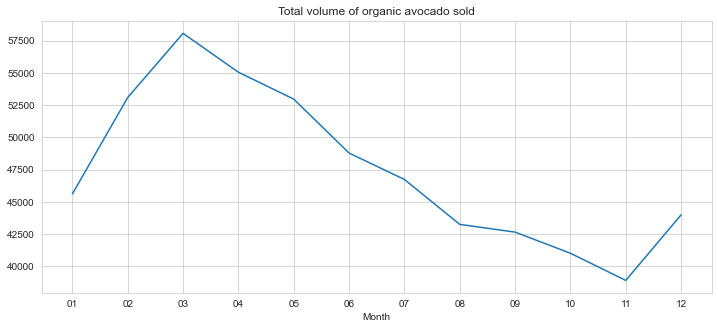

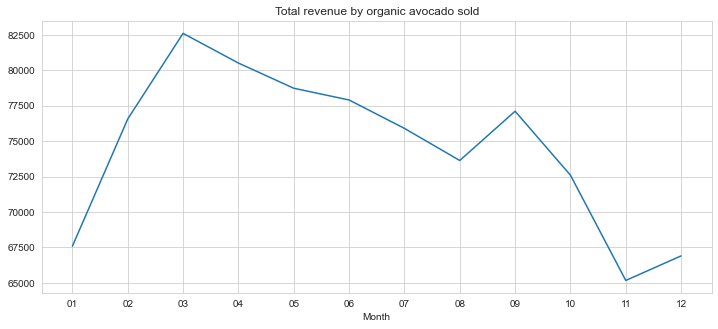

In [47]:
month_group=df_org.groupby('Month').mean()
fig, ax = plt.subplots(figsize=(12,5))
ax.xaxis.set(ticks=range(0,13)) 
month_group['AveragePrice'].plot(x=df_org.Month)
plt.title('Average Price by Month for organic')

month_group=df_org.groupby('Month').mean()
fig, ax = plt.subplots(figsize=(12,5))
ax.xaxis.set(ticks=range(0,13)) 
month_group['Total Volume'].plot(x=df_org.Month)
plt.title('Total volume of organic avocado sold')

month_group=df_org.groupby('Month').mean()
fig, ax = plt.subplots(figsize=(12,5))
ax.xaxis.set(ticks=range(0,13)) 
month_group['revenue'].plot(x=df_org.Month)
plt.title('Total revenue by organic avocado sold')

Text(0.5, 1.0, 'Type Average Price in Each Region')

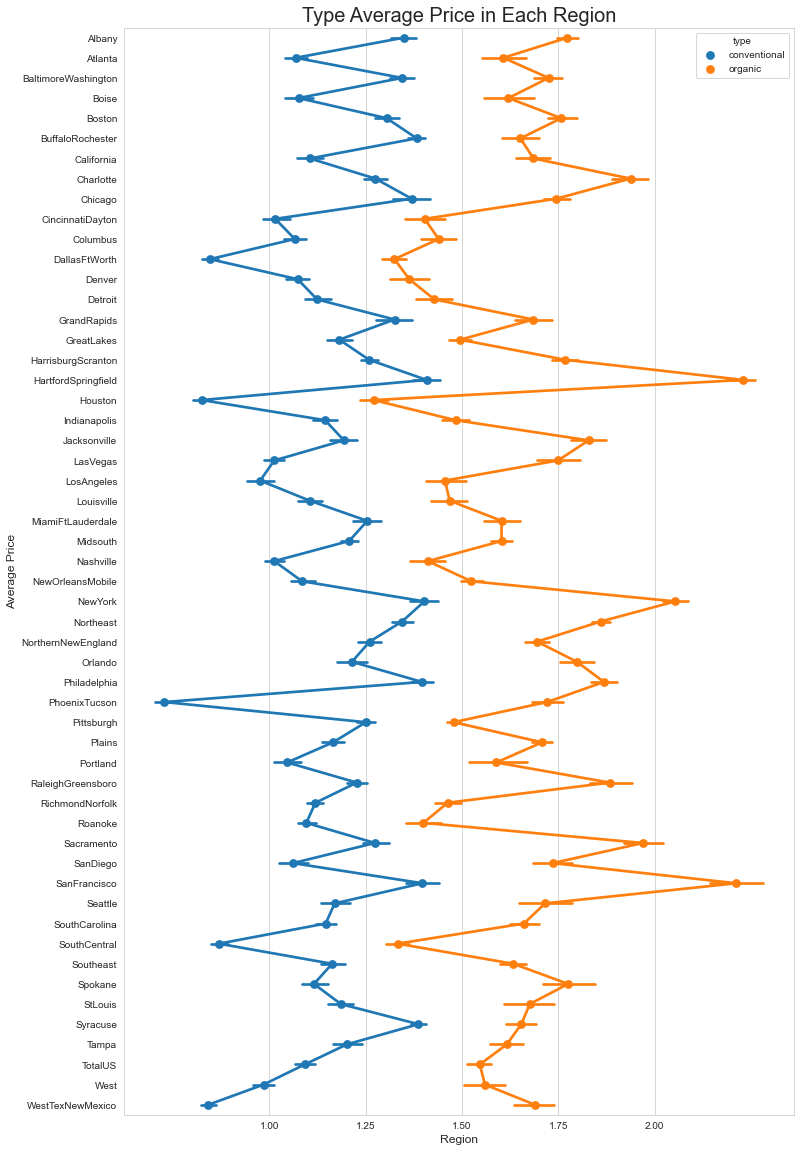

In [37]:
plt.figure(figsize=(12,20))
sns.set_style('whitegrid')
sns.pointplot(x='AveragePrice',y='region',data=df, hue='type',join=True)
plt.xticks(np.linspace(1,2,5))
plt.xlabel('Region',{'fontsize' : 'large'})
plt.ylabel('Average Price',{'fontsize':'large'})
plt.title("Average Price per type per region",{'fontsize':20})